In [1]:
import anndata
import numpy as np
import sys
import torch
sys.path.append('../../../../')
import velovae as vv
%load_ext autoreload
%autoreload 2

In [2]:
dataset = 'Retina'
root = "/scratch/blaauw_root/blaauw1/gyichen"
adata = anndata.read_h5ad(f'{root}/data/{dataset}_pp.h5ad')
adata.obs['clusters'] = adata.obs['Annotation'].to_numpy()

In [ ]:
#vv.preprocess(adata, n_gene=2000, min_shared_counts=20)
#adata.write_h5ad(f'data/{dataset}_pp.h5ad')

In [3]:
model_path_base = f'{root}/checkpoints/{dataset}'
figure_path_base = f'{root}/figures/{dataset}'
data_path = f'{root}/data/velovae/continuous/{dataset}'
gene_plot = ['Mcm6','Cdk1','Ccne2','Aurka']

# VeloVAE

In [4]:
figure_path = f'{figure_path_base}/VeloVAE'
model_path = f'{model_path_base}/VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)
vae = vv.VAE(adata, 
             tmax=20, 
             dim_z=5, 
             device='cuda:0')

vae.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

vae.save_model(model_path, 'encoder', 'decoder')
vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 723 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.58, 0.7744416496962723), (0.42, 0.3650230566137019)
KS-test result: [0. 1. 1.]
Initial induction: 1470, repression: 530/2000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 15, test iteration: 28
*********       Stage 1: Early Stop Triggered at epoch 600.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             ***

  0%|          | 0/2587 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.021
Average Set Size: 54
*********     Round 1: Early Stop Triggered at epoch 1078.    *********
Change in noise variance: 0.3068
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 1140.    *********
Change in noise variance: 0.0013
Change in x0: 0.1579
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 1180.    *********
Change in noise variance: 0.0004
Change in x0: 0.0764
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 1229.    *********
Change in noise variance: 0.0000
Change in x0: 0.0503
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 1241.    *********
Change in noise variance: 0.0000
Change in x0: 0.0422
*********             Velocity Refinement Round 

# Full VB

In [5]:
figure_path = f'{figure_path_base}/FullVB'
model_path = f'{model_path_base}/FullVB'

torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 full_vb=True)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'fullvb', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 723 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.58, 0.7744416496962723), (0.42, 0.3650230566137019)
KS-test result: [0. 1. 1.]
Initial induction: 1470, repression: 530/2000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 15, test iteration: 28
*********       Stage 1: Early Stop Triggered at epoch 323.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             ***

  0%|          | 0/2587 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.014
Average Set Size: 53
*********     Round 1: Early Stop Triggered at epoch 454.    *********
Change in noise variance: 0.2679
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 529.    *********
Change in noise variance: 0.0013
Change in x0: 0.2225
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 599.    *********
Change in noise variance: 0.0007
Change in x0: 0.1449
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 635.    *********
Change in noise variance: 0.0000
Change in x0: 0.1107
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 678.    *********
Change in noise variance: 0.0000
Change in x0: 0.0942
*********             Velocity Refinement Round 6    

# Plotting

In [2]:
root = '/scratch/blaauw_root/blaauw1/gyichen'
dataset = 'Retina'
adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/{dataset}/{dataset}_post.h5ad')

In [3]:
adata_utv = anndata.read_h5ad(f'{root}/data/utv/{dataset}/{dataset}.h5ad')
vel_genes = adata.var_names[adata.var['velocity_genes'].to_numpy()]

In [5]:
Ek = np.median(adata.layers['fullvb_velocity_u']**2 + adata.layers['fullvb_velocity']**2, 0)
gidx = np.argsort(Ek)[-4:]

---   Plotting  Results   ---


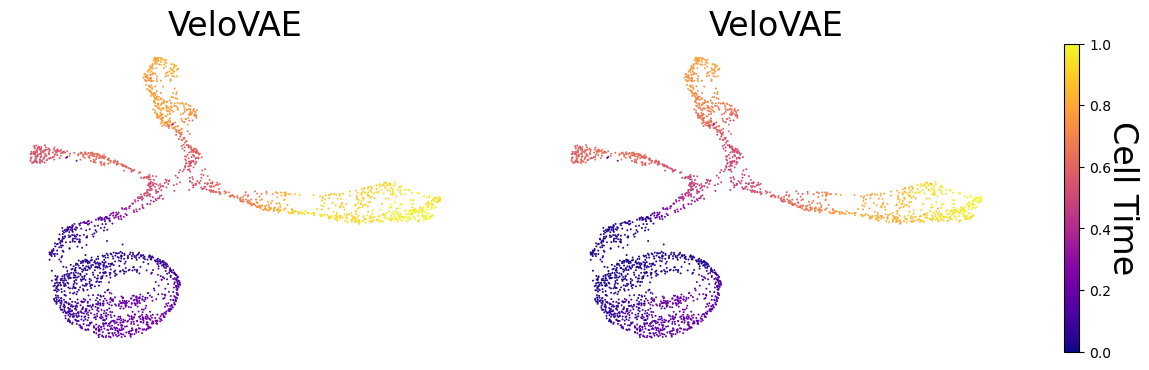

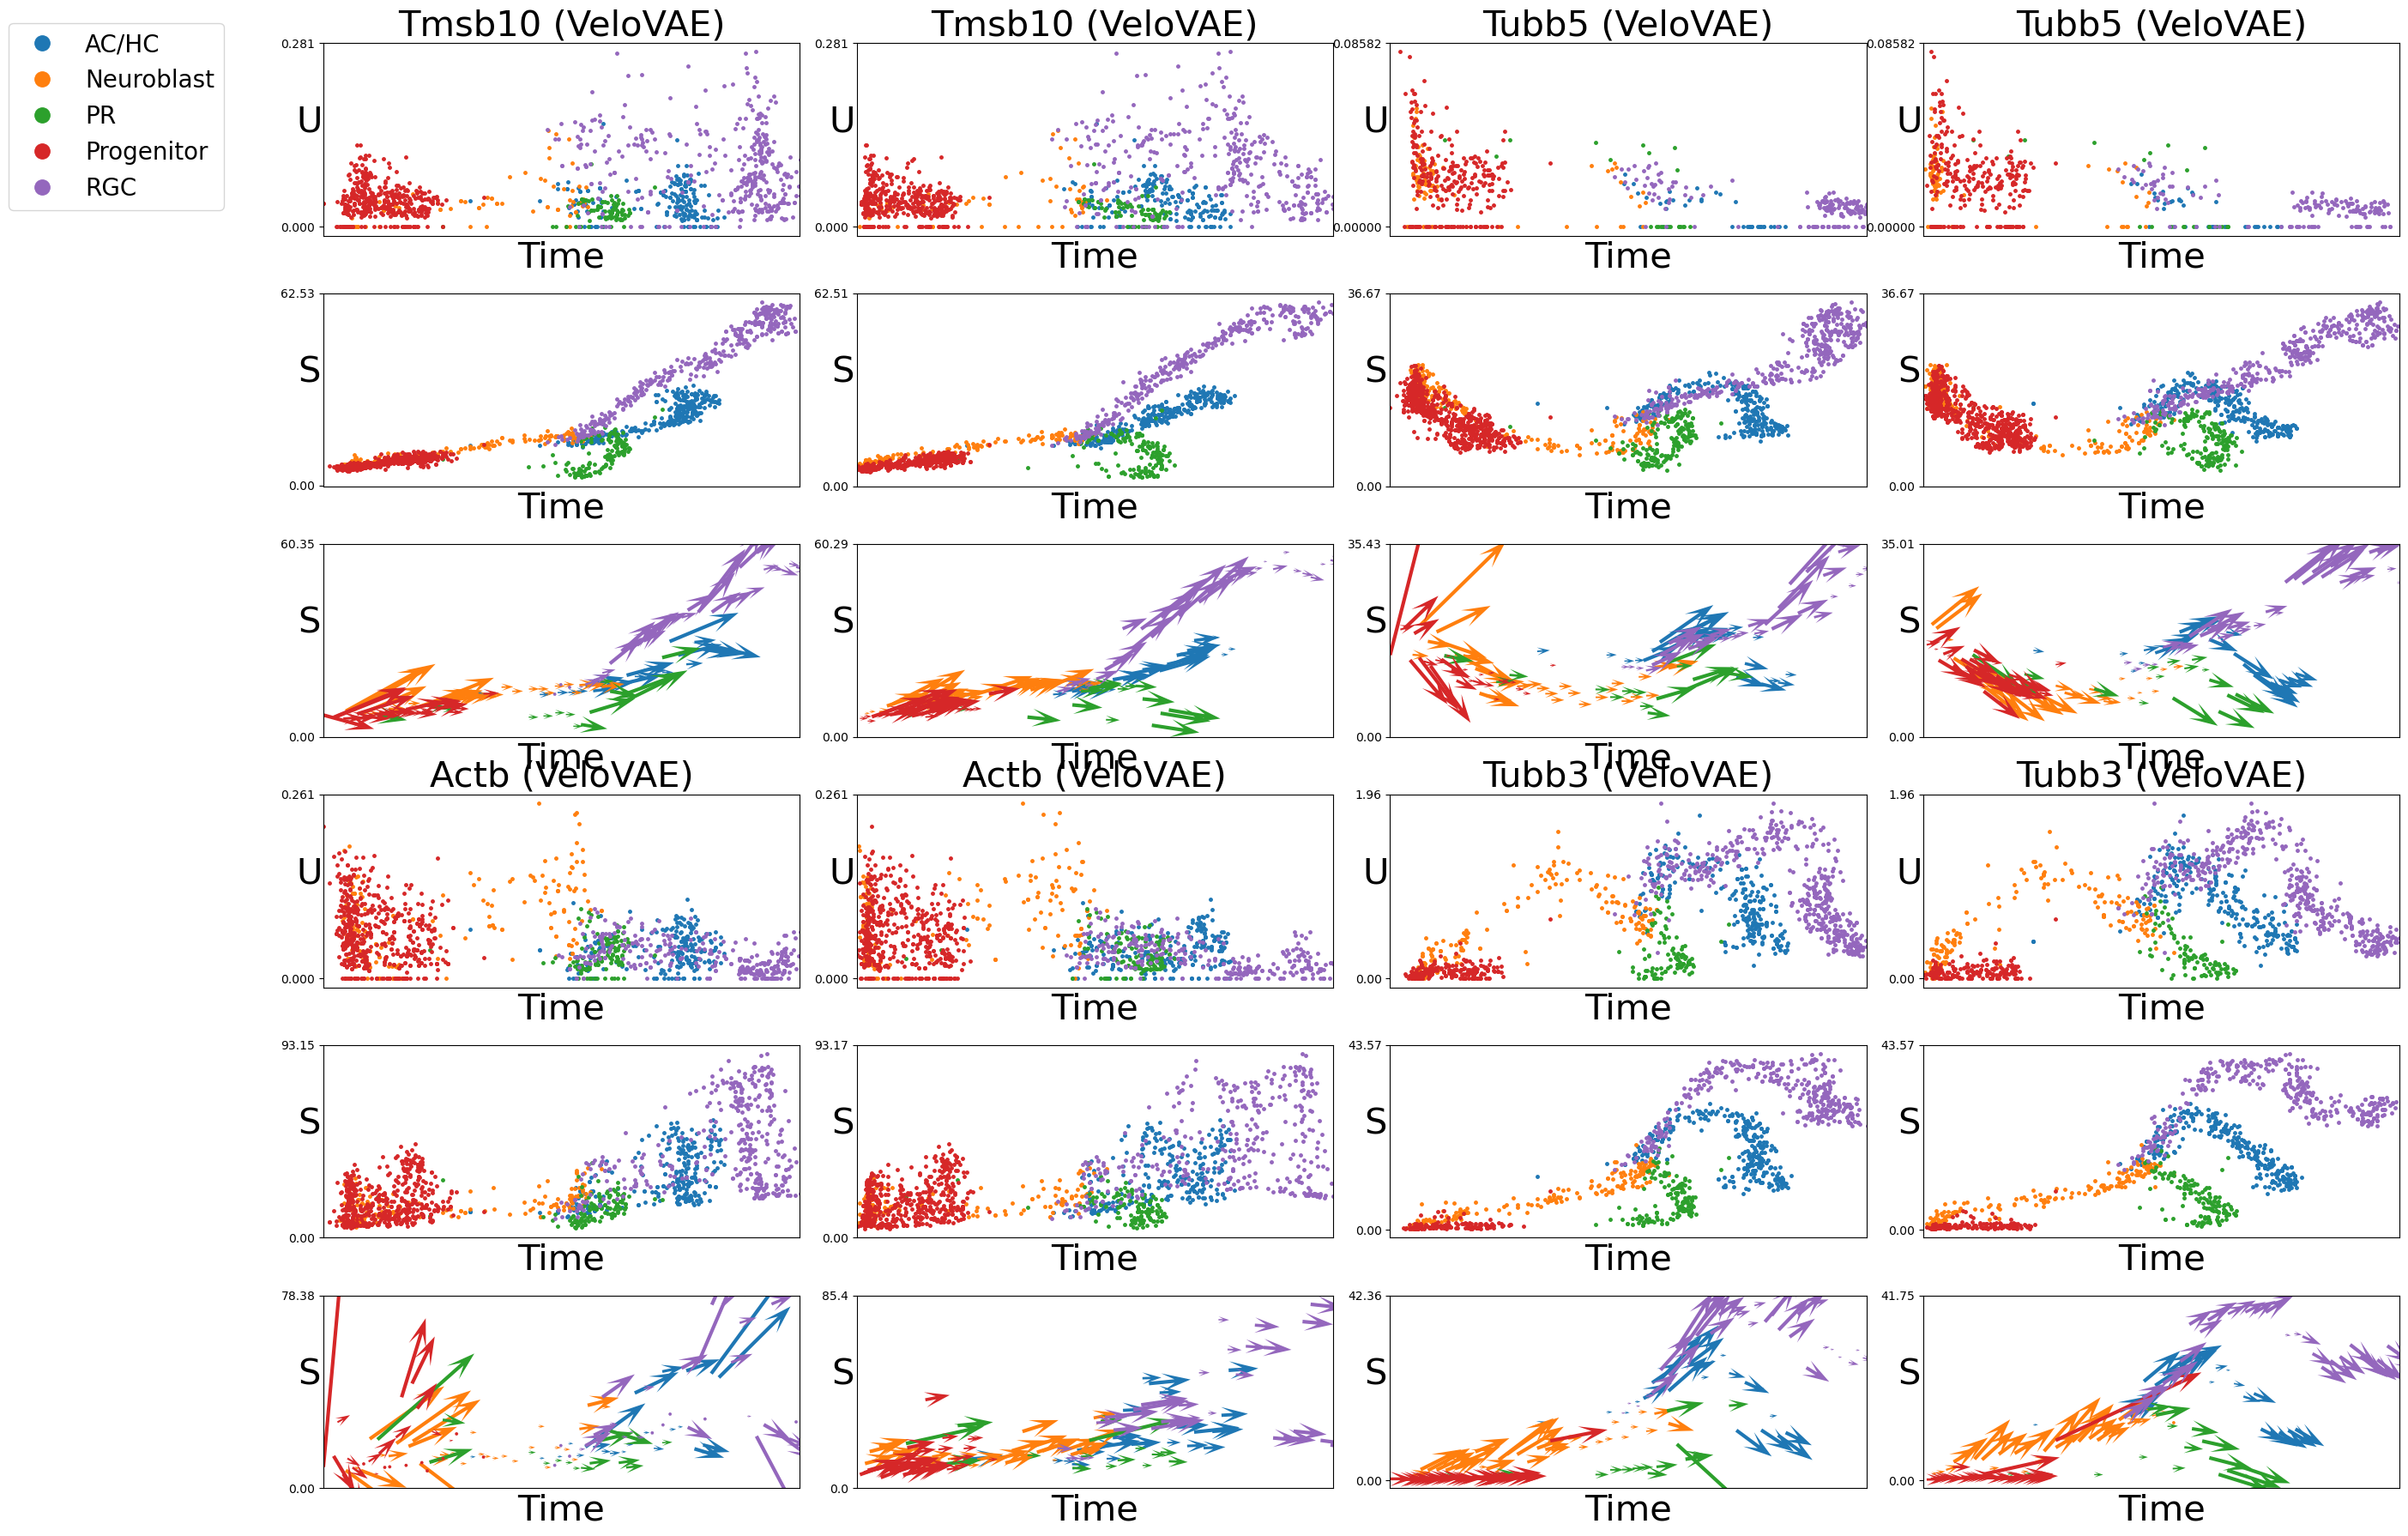

In [6]:
gidx = np.argsort(Ek)[-4:]
gene_plot = adata.var_names[gidx]
res, res_type = vv.post_analysis(adata,
                                 dataset,
                                 ['VeloVAE', 'FullVB'],
                                 ['velovae', 'fullvb'],
                                 compute_metrics=False,
                                 genes=gene_plot,
                                 plot_type=['time', 'gene'],
                                 grid_size=(2,2),
                                 figure_path=f'{root}/figures/{dataset}')

computing velocity graph (using 4/36 cores)


  0%|          | 0/2587 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'fullvb_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'fullvb_velocity_umap', embedded velocity vectors (adata.obsm)


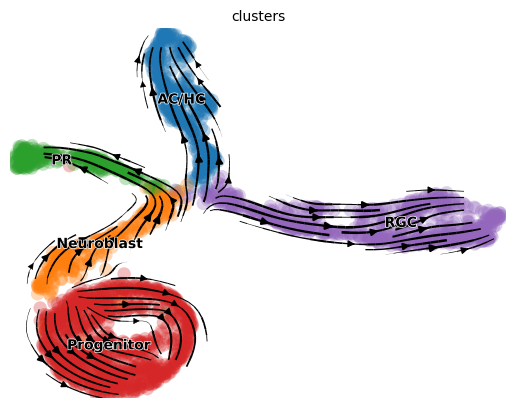

In [15]:
import scvelo as scv
scv.tl.velocity_graph(adata, vkey='fullvb_velocity', gene_subset=vel_genes, n_jobs=4)
scv.tl.velocity_embedding(adata, vkey='fullvb_velocity')
scv.pl.velocity_embedding_stream(adata, vkey='fullvb_velocity')